In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [7]:
def download_data(stock, start, end):
    data = {}
    ticker =  yf.download(stock, start, end)
    data['Price'] = ticker['Adj Close']
    return pd.DataFrame(data)

In [64]:
def construct_signals(data, short_period, long_period):
    data['Short SMA'] =  data['Price'].rolling(window=short_period).mean()
    data['Long SMA']  =  data['Price'].rolling(window=long_period).mean()

In [65]:
def plot_data(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['Price'], label='Stock Price', color = 'black')
    plt.plot(data['Short SMA'], label='Short MA', color = 'red')
    plt.plot(data['Long SMA'], label='Long MA', color = 'blue')
    plt.title('Moving Average (MA) Indicators')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

[*********************100%***********************]  1 of 1 completed
                 Price  Short SMA   Long SMA
Date                                        
2010-10-18  100.120605  92.046192  89.639575
2010-10-19   96.755943  92.130731  89.665823
2010-10-20   97.484917  92.232092  89.701243
2010-10-21   98.017670  92.372287  89.742263
2010-10-22   97.905533  92.531689  89.784277


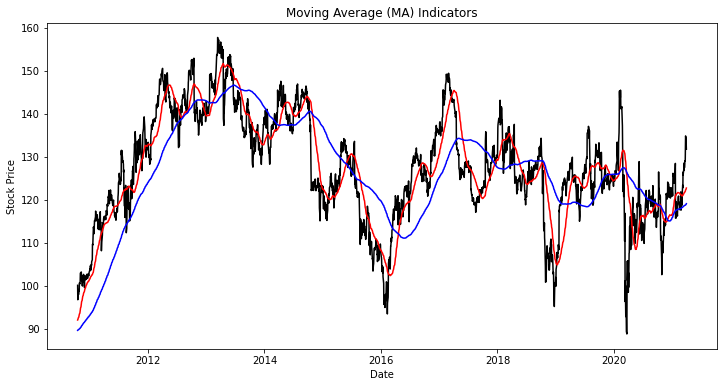

In [66]:
if __name__ == '__main__':
    
    start_date = datetime.datetime(2010, 1, 1)
    end_date   = datetime.datetime(2021, 4, 1)
    
    stock_data = download_data('IBM', start_date, end_date)
    construct_signals(stock_data, 50, 200)
    stock_data.dropna(how='any', inplace= True)
    print(stock_data.head(5))
    plot_data(stock_data)